In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv('/content/heart_disease_1000_records.csv')
display(df.head())

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,67,Male,237,153,101,Former,NaN,8,No,No,No,5,173,Yes,Atypical Angina,0
1,57,Female,258,145,77,Never,Moderate,3,Yes,No,Yes,1,103,No,Atypical Angina,1
2,43,Female,219,94,75,Never,Heavy,8,No,No,No,3,171,Yes,Atypical Angina,0
3,71,Male,307,134,75,Never,NaN,1,No,No,No,1,196,No,Atypical Angina,1
4,36,Female,223,87,97,Never,Moderate,9,No,No,No,3,138,No,Atypical Angina,0


In [6]:
print("Dataset Overview:")
print(df.head())
print(df.info())

Dataset Overview:
   Age  Gender  Cholesterol  Blood Pressure  Heart Rate Smoking  \
0   67    Male          237             153         101  Former   
1   57  Female          258             145          77   Never   
2   43  Female          219              94          75   Never   
3   71    Male          307             134          75   Never   
4   36  Female          223              87          97   Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0            NaN               8             No       No      No   
1       Moderate               3            Yes       No     Yes   
2          Heavy               8             No       No      No   
3            NaN               1             No       No      No   
4       Moderate               9             No       No      No   

   Stress Level  Blood Sugar Exercise Induced Angina  Chest Pain Type  \
0             5          173                     Yes  Atypical Angina   
1             1         

In [7]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             294
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


In [8]:
# Convert categorical variables to numerical using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Smoking', 'Alcohol Intake', 'Family History',
                                         'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type'],
                            drop_first=True)


In [9]:
# Separate features and target variable
X = df_encoded.drop(columns=['Heart Disease']).values
y = df_encoded['Heart Disease'].values


In [10]:
# Standardization Function
def standardize(X):
    # Convert X to numeric dtype if necessary
    X = X.astype(np.float64)  # or any suitable numeric dtype
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X, mean_X, std_X = standardize(X)

In [11]:
# Add bias term (column of ones) for logistic regression
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term


In [12]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
formula = "P(Y = 1) = 1 / (1 + e^(- (β0 + β1X1 + β2X2 + ... + βnXn)))"
print(formula)

P(Y = 1) = 1 / (1 + e^(- (β0 + β1X1 + β2X2 + ... + βnXn)))


In [15]:
# Logistic Regression Hypothesis
def logistic_regression(X, theta):
    return sigmoid(np.dot(X, theta))

In [16]:
# Log Loss Function (Cost Function)
def log_loss(y, y_pred):
    m = len(y)
    return - (1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [17]:
# Gradient Descent for Logistic Regression
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = logistic_regression(X, theta)
        gradient = (1/m) * np.dot(X.T, (predictions - y))
        theta -= alpha * gradient
    return theta

In [18]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [19]:
# ... (Previous code)

# Initialize theta (weights) to zeros
theta = np.zeros(X_train.shape[1])

# Set learning rate and iterations
alpha = 0.01
iterations = 5000

# Train using Gradient Descent
theta_final = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Print the optimized theta values
print("Final Theta Values (Model Coefficients):")
print(theta_final)

# Predictions  <--- Moved this block up
y_pred_prob = logistic_regression(X_test, theta_final)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute and print the accuracy
accuracy_value = accuracy(y_test, y_pred)

print("Model Accuracy:")
print(f"{accuracy_value:.4f}")  # Display accuracy with 4 decimal places

# ... (Rest of the code)

Final Theta Values (Model Coefficients):
[-0.99235624  1.18796802  1.33580791  0.9965815   0.07285804 -0.9818687
 -0.07340185  0.0692807  -0.02729629 -1.00886054 -1.31810061 -0.0778587
 -0.02560963  0.9583161   1.34468419 -0.00153304 -0.18933295  0.08984963
  0.04184169]
Model Accuracy:
0.9050


In [21]:
# Predictions
y_pred_prob = logistic_regression(X_test, theta_final)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [20]:
print("Predicted Probabilities:")
print(y_pred_prob[:10])

Predicted Probabilities:
[0.01067843 0.00512093 0.86195667 0.42499076 0.0254367  0.26942506
 0.44018518 0.30878917 0.01808423 0.02864863]


In [22]:
print("\nFinal Binary Predictions (0 = No Disease, 1 = Disease):")
print(y_pred[:10])


Final Binary Predictions (0 = No Disease, 1 = Disease):
[0 0 1 0 0 0 0 0 0 0]


In [23]:
# Accuracy Function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [24]:
# Precision Function
def precision(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

In [25]:
# Recall Function
def recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

In [26]:
# F1 Score Function
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

In [27]:
# Print evaluation metrics
print(f"Accuracy: {accuracy(y_test, y_pred):.4f}")
print(f"Precision: {precision(y_test, y_pred):.4f}")
print(f"Recall: {recall(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9050
Precision: 0.9242
Recall: 0.8133
F1 Score: 0.8652


In [28]:
# Confusion Matrix Function
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Print the AUC Score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {auc_score:.4f}")

ROC-AUC Score: 0.9680


In [31]:
# Get predicted probabilities for the positive class (class 1)
y_pred_prob = logistic_regression(X_test, theta_final)

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

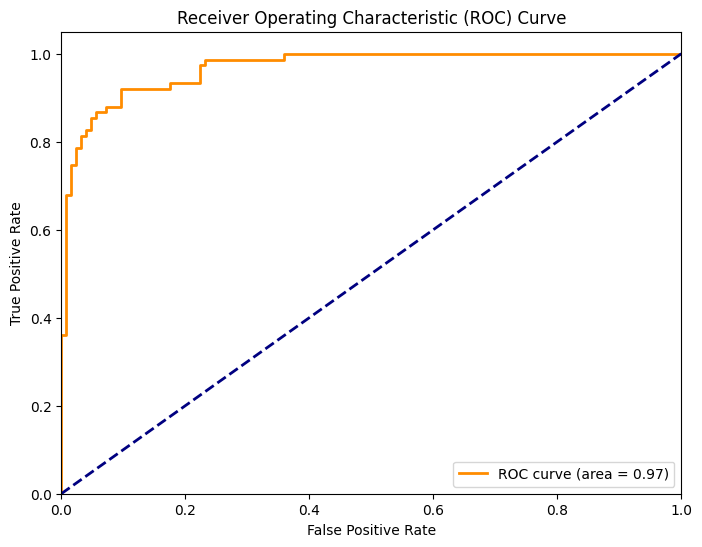

In [32]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

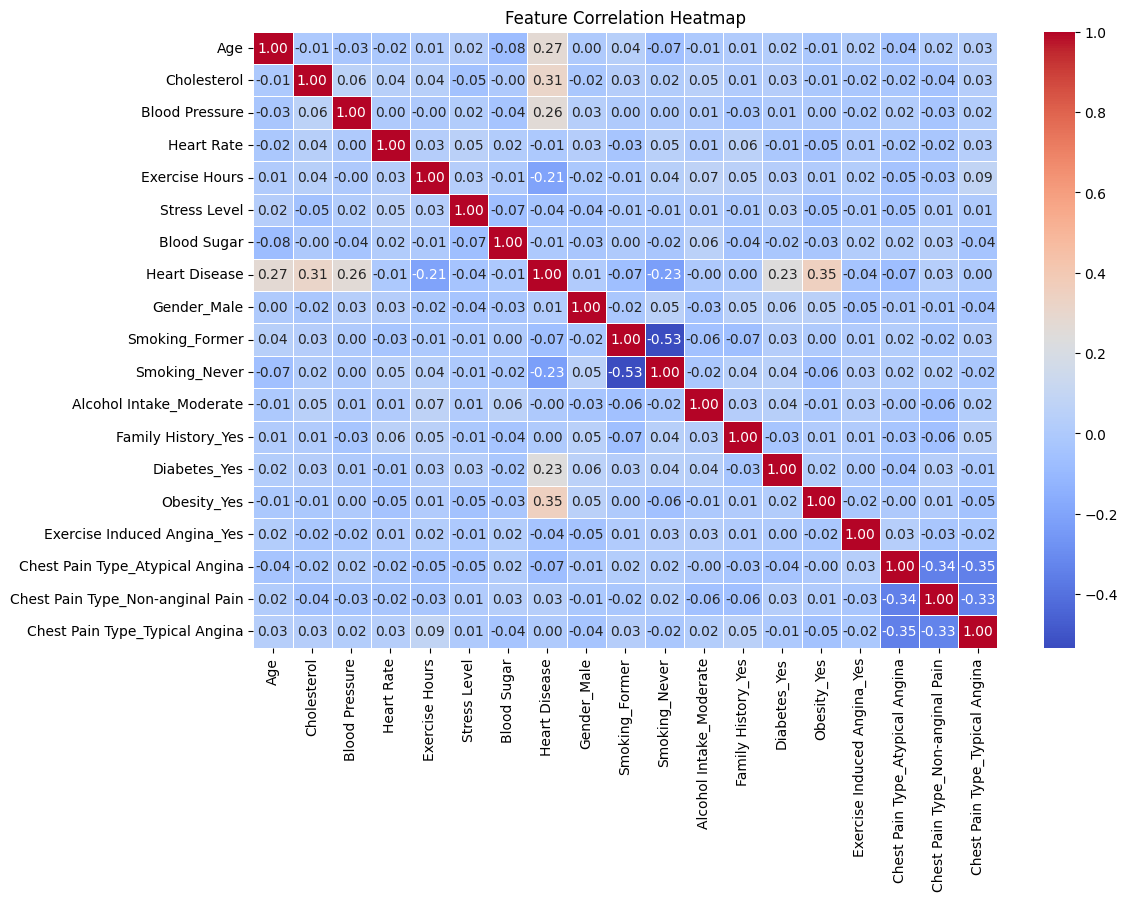

In [33]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()


In [34]:
coefficients = theta_final[1:]  # Exclude the intercept

In [35]:
feature_names = df_encoded.drop(columns=['Heart Disease']).columns

/tmp/ipython-input-1443337453.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_names, y=coefficients, palette=colors)


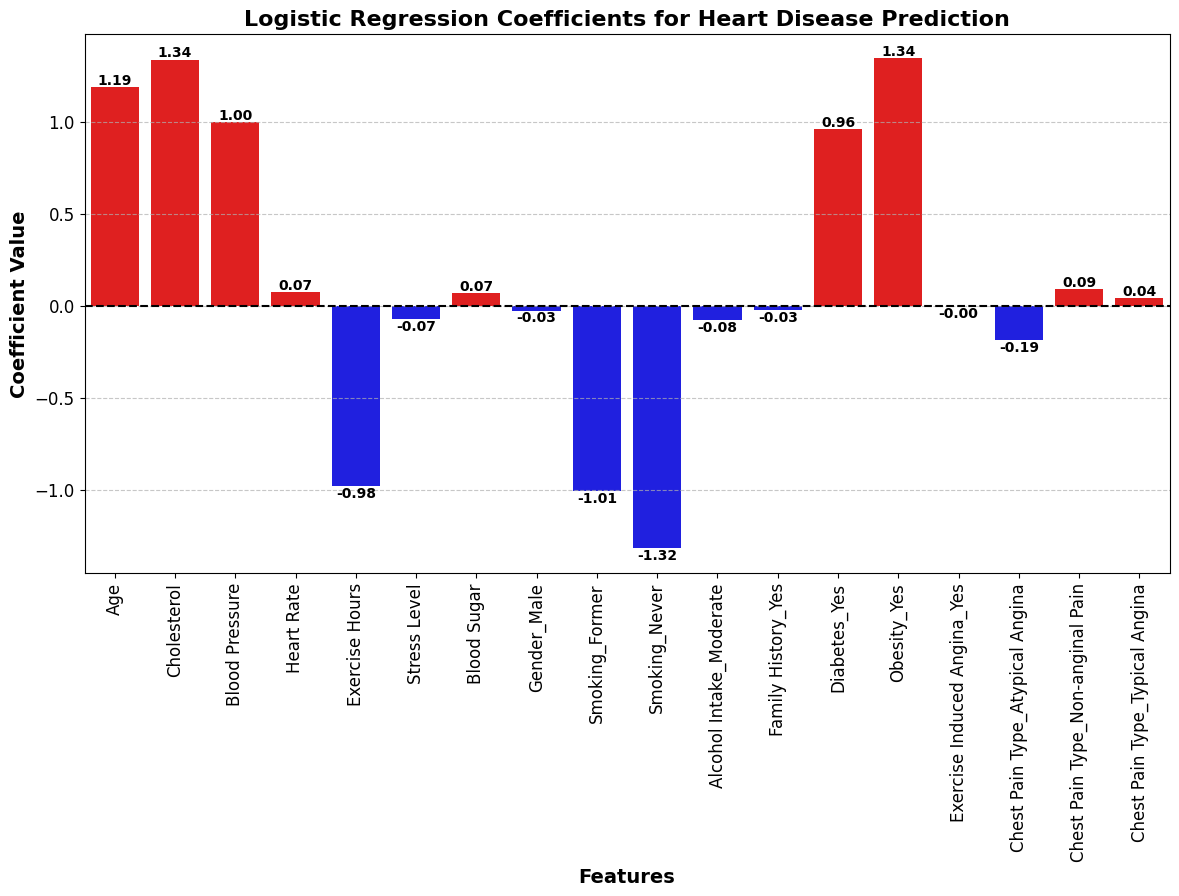

In [36]:
# Enhanced visualization with additional details
plt.figure(figsize=(14, 7))

# Color coding: Positive (Red), Negative (Blue)
colors = ['red' if coef > 0 else 'blue' for coef in coefficients]

# Create barplot with color coding - Use 'feature_names' instead of 'features'
ax = sns.barplot(x=feature_names, y=coefficients, palette=colors)

# Add coefficient values on bars
for index, coef in enumerate(coefficients):
    ax.text(index, coef, f"{coef:.2f}", ha='center', va='bottom' if coef > 0 else 'top', fontsize=10, fontweight='bold')

# Customize the graph
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Features", fontsize=14, fontweight='bold')
plt.ylabel("Coefficient Value", fontsize=14, fontweight='bold')
plt.title("Logistic Regression Coefficients for Heart Disease Prediction", fontsize=16, fontweight='bold')
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')  # Add reference line at 0
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

# Show the plot
plt.show()

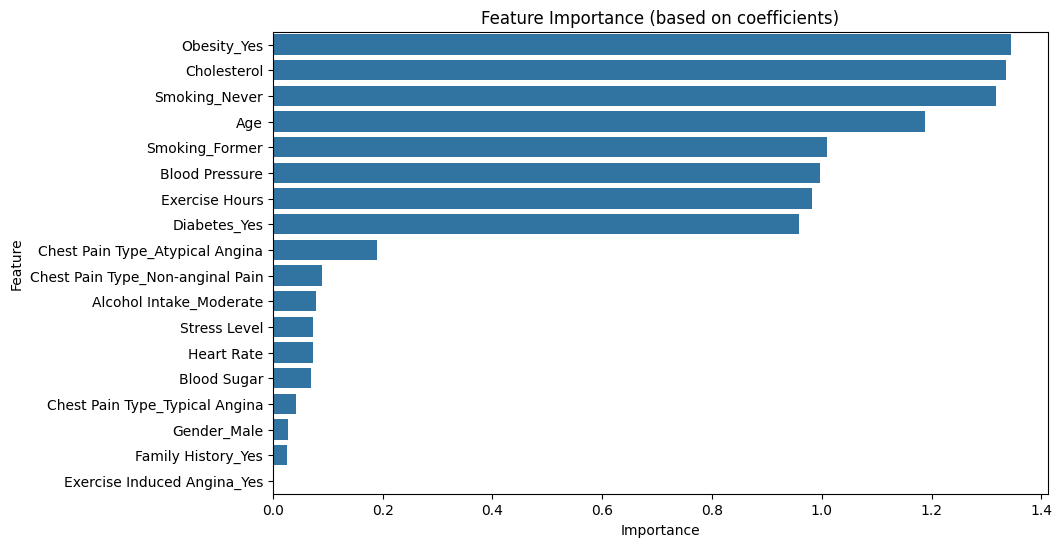

In [37]:
# 4. Feature Importance (using coefficients)
# Assuming 'theta_final' contains your model's coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(theta_final[1:])})  # Use feature_names and coefficients
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (based on coefficients)')
plt.show()

In [38]:
# Load dataset - Replace 'your_dataset.csv' with the correct file name
df = pd.read_csv("heart_disease_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_dataset.csv'

In [39]:
descriptive_stats = df.describe()
print(descriptive_stats)

               Age  Cholesterol  Blood Pressure   Heart Rate  Exercise Hours  \
count  1000.000000  1000.000000     1000.000000  1000.000000     1000.000000   
mean     53.379000   230.515000      131.659000    82.211000        4.491000   
std      14.122138    48.078533       26.660711    15.919608        2.901092   
min      29.000000   150.000000       85.000000    55.000000        0.000000   
25%      41.000000   186.750000      109.000000    69.000000        2.000000   
50%      54.000000   231.000000      131.000000    82.000000        4.000000   
75%      65.000000   273.000000      154.000000    96.000000        7.000000   
max      77.000000   309.000000      179.000000   109.000000        9.000000   

       Stress Level  Blood Sugar  Heart Disease  
count   1000.000000  1000.000000    1000.000000  
mean       4.954000   132.893000       0.376000  
std        2.543689    36.418867       0.484622  
min        1.000000    70.000000       0.000000  
25%        3.000000   101.000

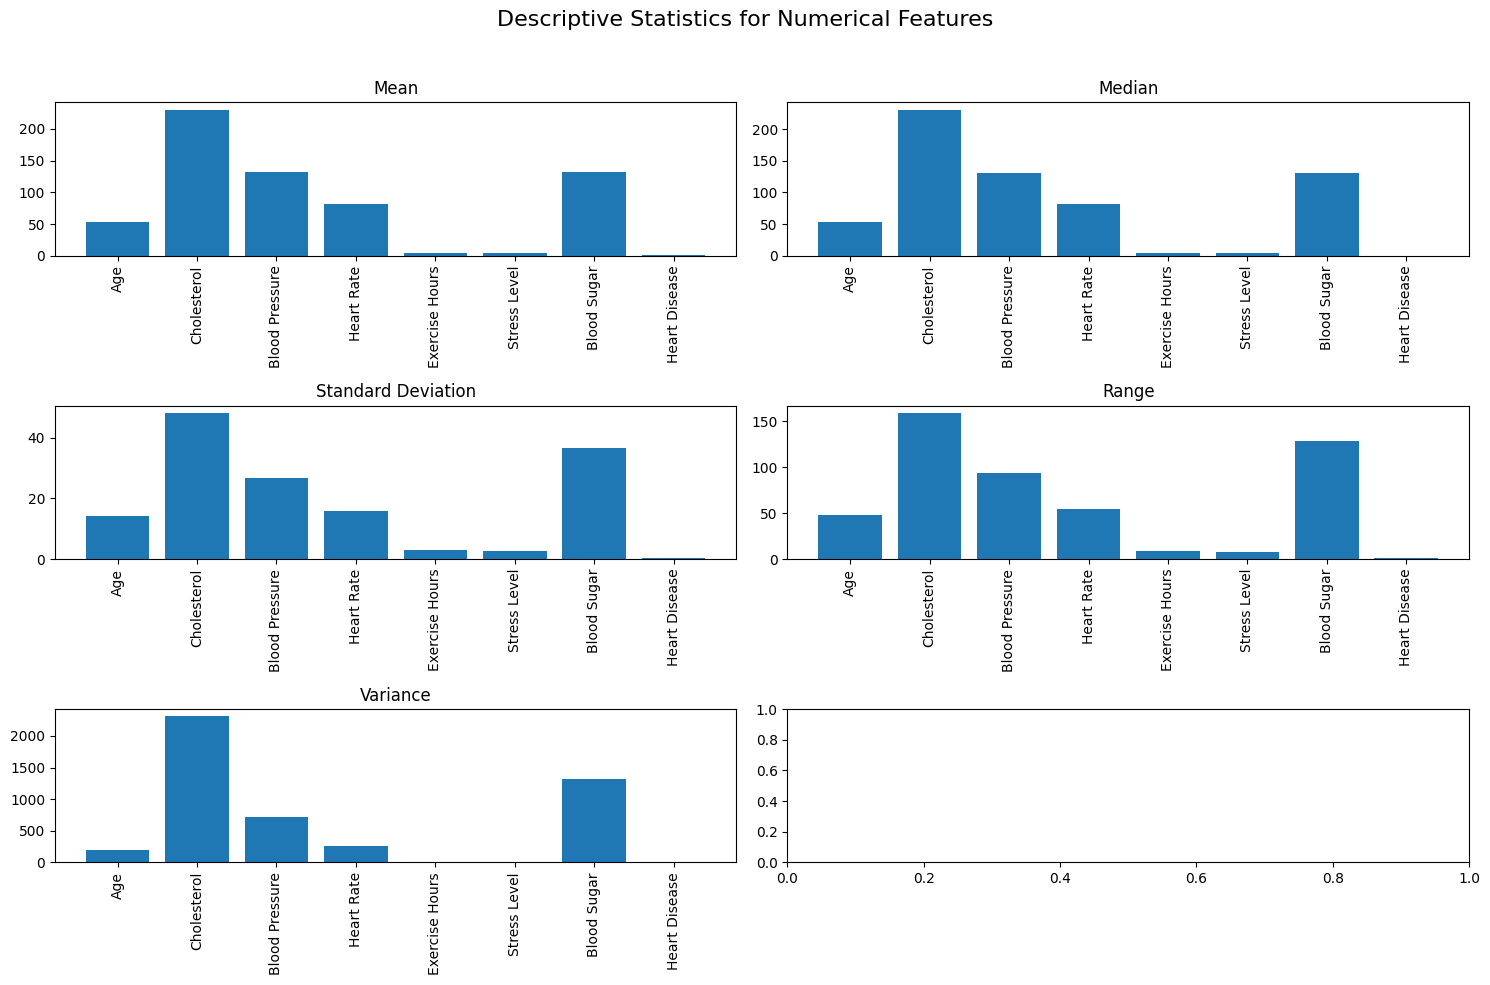

In [40]:
# Select numerical features only
num_features = df.select_dtypes(include=[np.number])

# Compute descriptive statistics
stats = {
    'Mean': num_features.mean(),
    'Median': num_features.median(),
    'Standard Deviation': num_features.std(),
    'Range': num_features.max() - num_features.min(),
    'Variance': num_features.var(),
}

# Create a 3x2 subplot layout
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Descriptive Statistics for Numerical Features', fontsize=16)

# Plot each statistic
for ax, (stat_name, values) in zip(axes.flatten(), stats.items()):
    ax.bar(values.index, values.values)
    ax.set_title(stat_name)
    ax.tick_params(axis='x', rotation=90)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/tmp/ipython-input-3362792930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Disease", data=df, palette=["green", "red"])


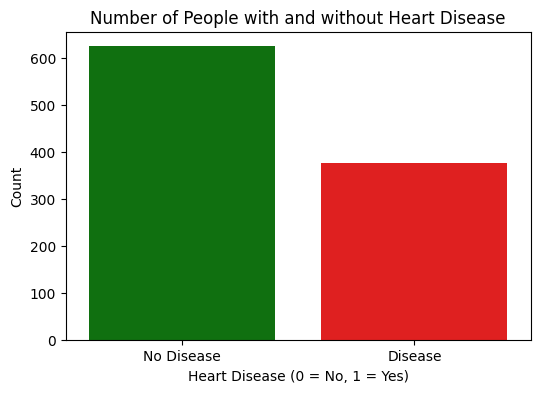

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Heart Disease", data=df, palette=["green", "red"])
plt.title("Number of People with and without Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.show()